# Цель лабораторной работы

Изучить различные методы визуализации данных

# Задание

Требуется выполнить следующие действия
* Выбрать набор данных
* Создать ноутбук, который содержить следующие разделы:
  1. Текстовое описание выбранного наборы данных
  2. Основные характеристики датасета
  3. Визуальное исследование датасета
  4. Информация о корелляции признаков
* Сформировать отчет и разместить его на своем репозитории GitHub

# Ход выполнения лабораторной работы

## Текстовое описание набора данных
   
   В качестве набора данных используются данные о стоимости домов в Бостоне.  
   Данный датасет содержит следующие колонки:
   * CRIM уровень преступности на душу населения по городам
   * ZN доля жилой земли, зонированной на участки свыше 25 000 кв.фут.
   * INDUS доля акров не-розничного бизнеса в городе
   * CHAS Фиктивная переменная Чарльза (= 1, Если тракт ограничивает реку; 0 в противном случае)
   * NOX концентрация оксидов азота (частей на 10 млн.)
   * RM среднее количество комнат в одном жилом помещении
   * AGE доля единиц, занятых владельцами, построенных до 1940 года
   * DIS взвешенные расстояния до пяти бостонских центров занятости
   * RAD индекс доступности до радиальных магистралей
   * TAX ставка налога на имущество на полную стоимость за 10 000 долл. США
   * PTRATIO Соотношение учеников и учителей по городам
   * B 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам
   * LSTAT \% более низкий статус населения
   * MEDV Средняя стоимость домов, занимаемых владельцами, в 1000 долларов
   
## Основные характеристики датасета
   
   Подключим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from sklearn.datasets import load_boston

Настроим отображение графиков

In [2]:
%matplotlib inline
sns.set(style='ticks')
set_matplotlib_formats('retina')

Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчете влеза на А4

In [3]:
pd.set_option('display.width', 70)

Загрузим данные и преобразуем их Pandas Dataframe

In [4]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [5]:
data = make_dataframe(load_boston)

In [6]:
data.shape

(506, 14)

In [7]:
# Список колонок
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
target - 0


In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

Проверим основные статистические характеристики набора данных

In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Визуальное исследование датасета
### Диаграмма рассеяния  
   Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.

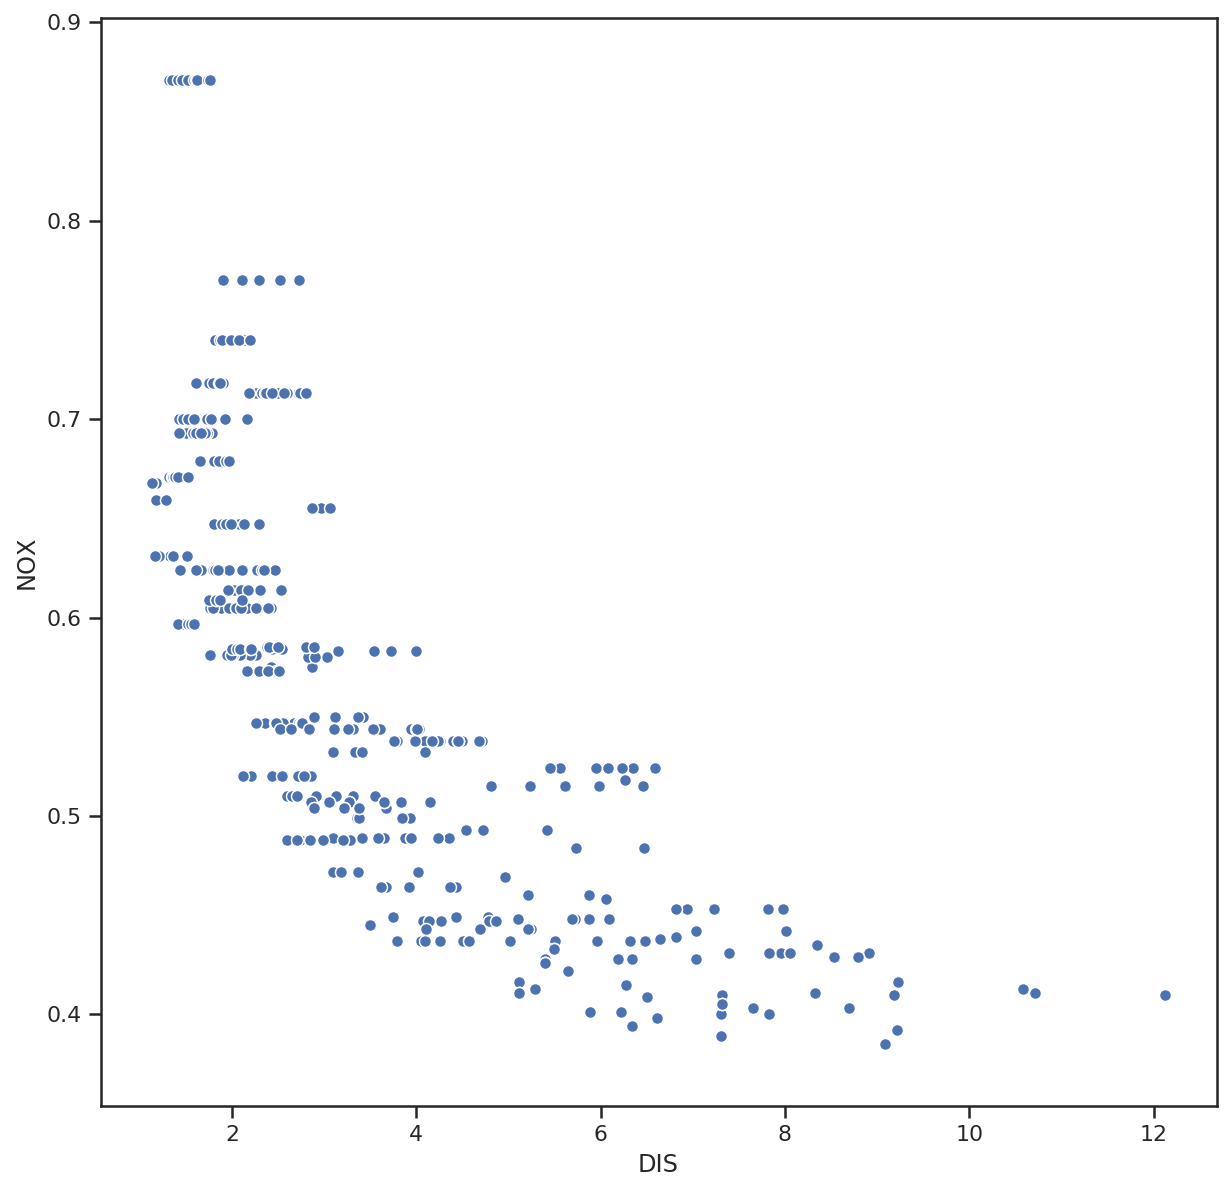

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='DIS', y='NOX', data=data)

Как видим, чем ближе к бостонским центрам занятости, тем выше концетрация оксидов озота в воздухе

### Гистограмма  
Позволяет оценить плотность вероятности распределения данных.

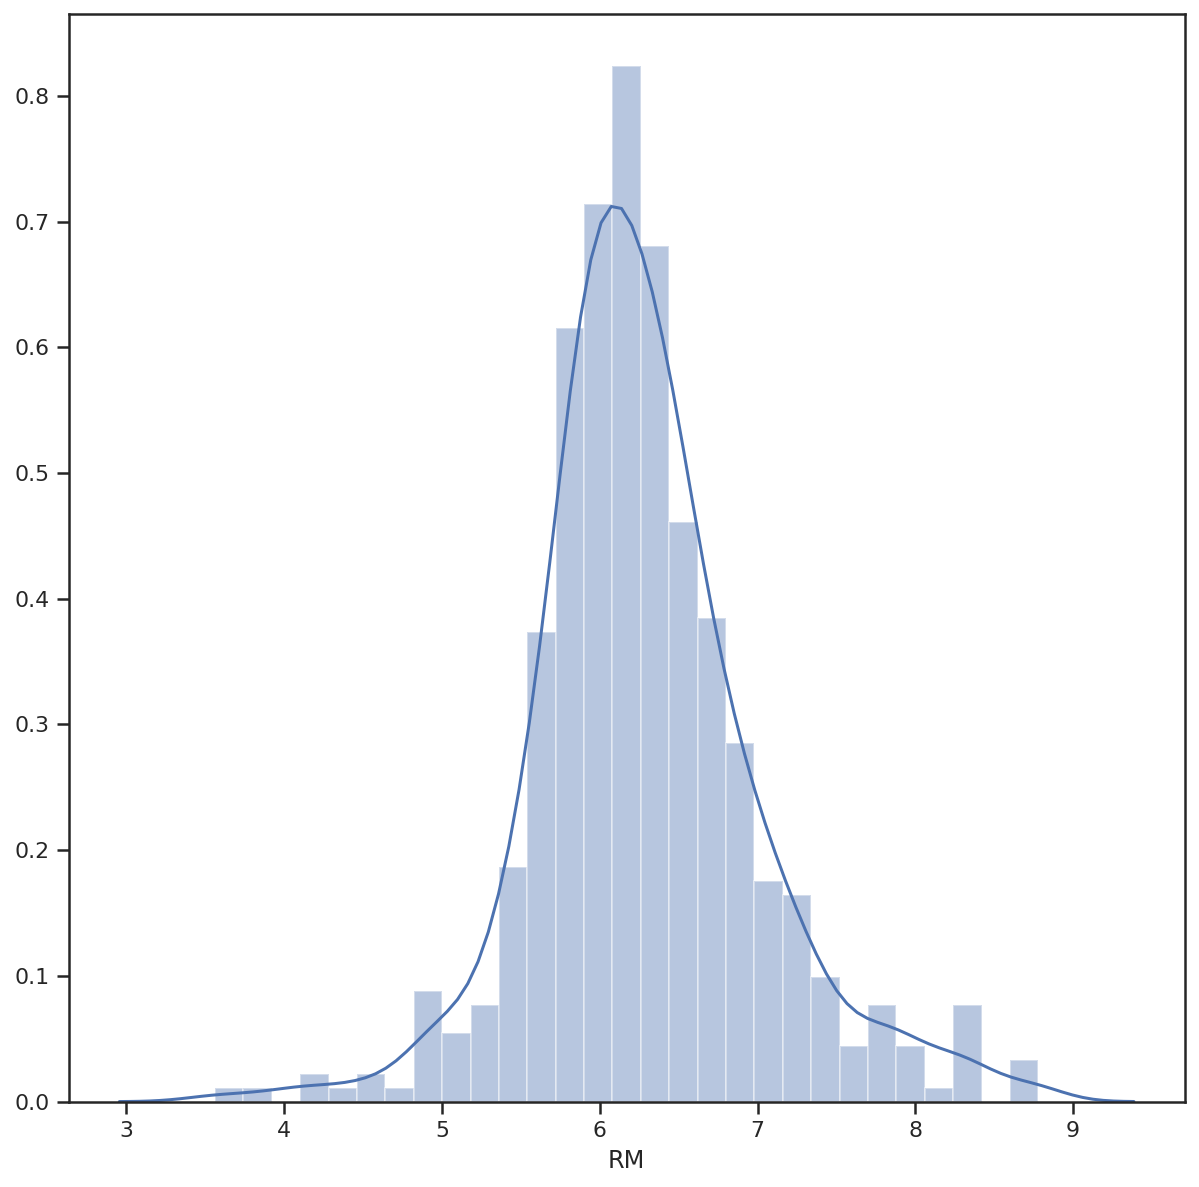

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['RM'])

Как видим, что среднее количество комнат в одном жилом помещении в большинстве случаем равно 6  

### Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.
Выводится матрица графиков. На пересечении строки и столбца,
которые соответстуют двум показателям, строится диаграмма рассеивания.
В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

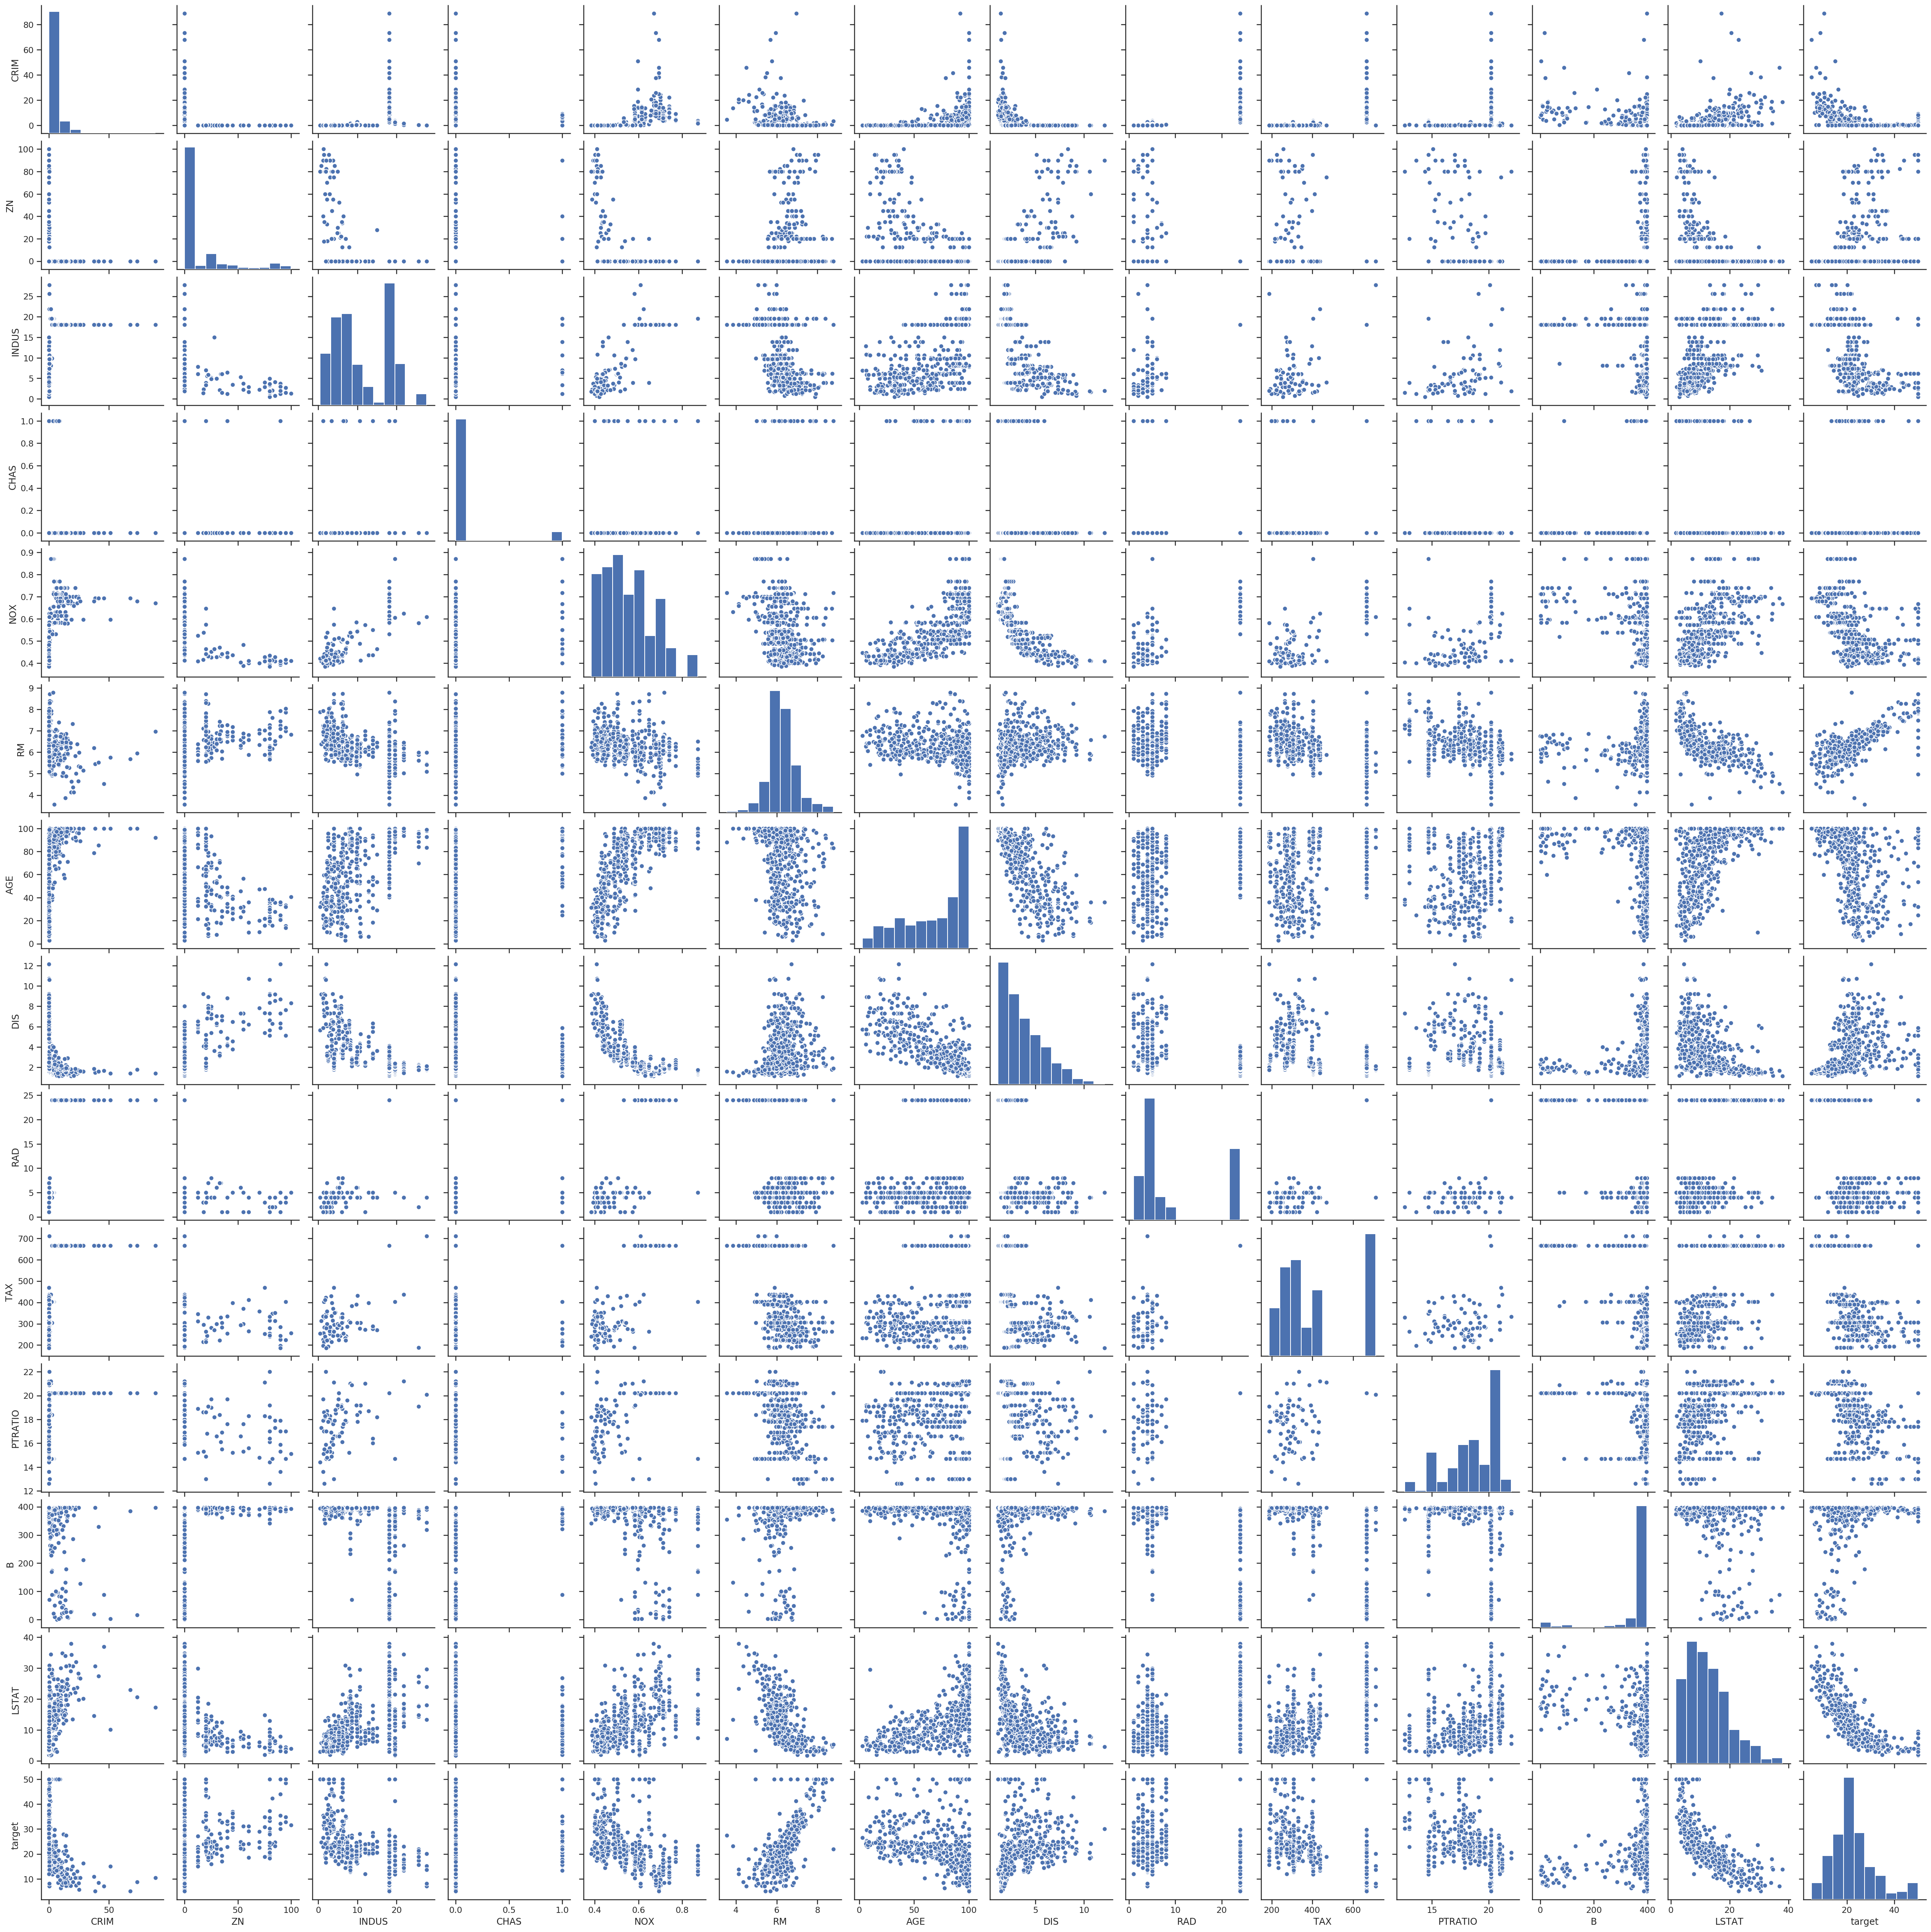

In [14]:
sns.pairplot(data)

## Информация о корелляции признаков

Построим корреляционную матрицу по всему набору данных  
Проверка корреляции признаков позволяет решить две задачи:

* Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "RM").Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
    
* Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [15]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


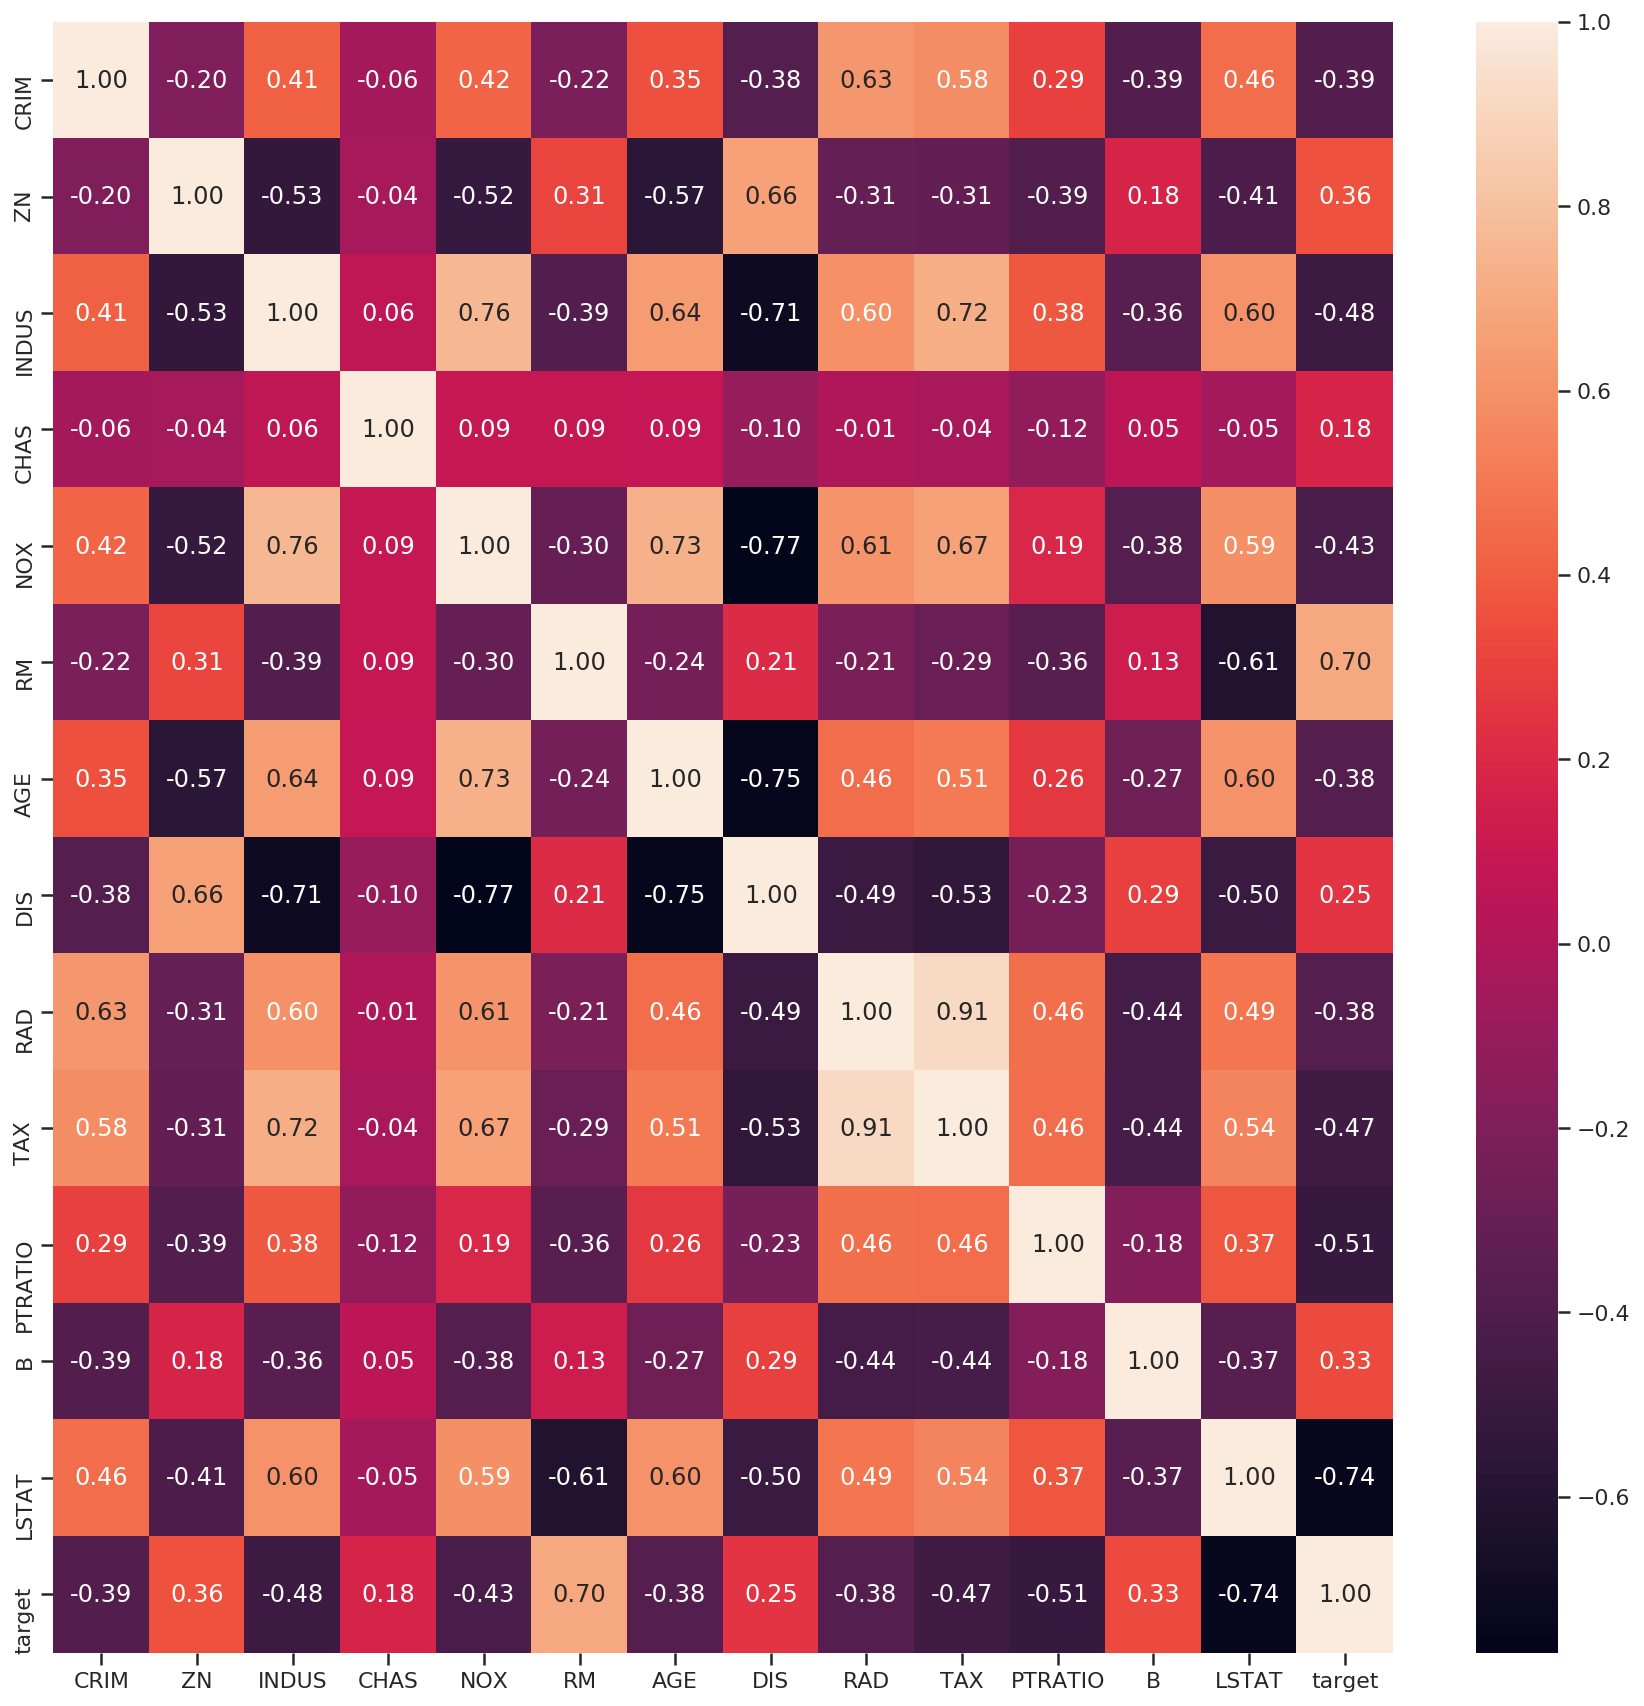

In [16]:
# Визуализируем корреляционную матрицу с помощью тепловой карты
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')